In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
from collections import namedtuple
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [24]:
from utils import *
from ES import ES
from benchmarks import *

test: próba 0; wynik: 11.444307248218871; czas: 0.1512470245361328
test: próba 1; wynik: 9.918232667692987; czas: 0.12049746513366699
test: próba 2; wynik: 12.010336476076041; czas: 0.15681934356689453
test: próba 3; wynik: 10.983177660227744; czas: 0.12731575965881348
test: próba 4; wynik: 11.676591161948961; czas: 0.13972115516662598
test: próba 5; wynik: 11.747564272542935; czas: 0.12716913223266602
test: próba 6; wynik: 10.15151694983453; czas: 0.13528990745544434
test: próba 7; wynik: 13.03123539323034; czas: 0.12401509284973145
test: próba 8; wynik: 9.959318840427647; czas: 0.15446257591247559
test: próba 9; wynik: 11.143850181598152; czas: 0.12341189384460449


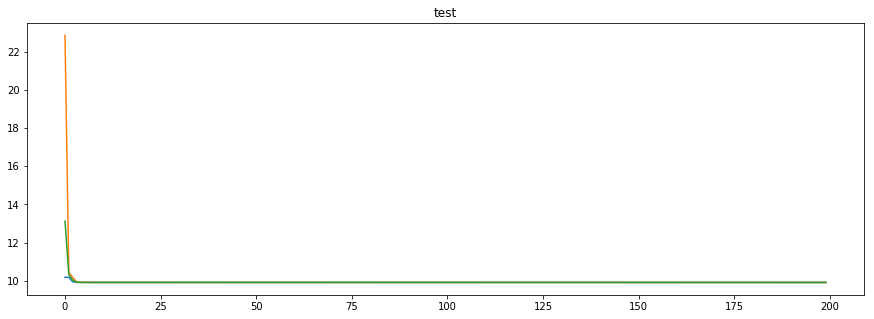


Wynik test: 9.918232667692987; czas: 1.5522570610046387, 





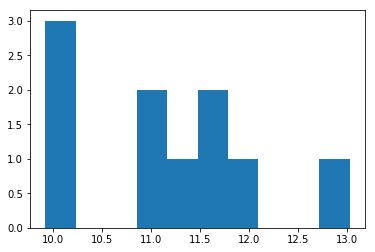

In [100]:
evkwargs = {
        'mi':100,
        'Lambda':150,
        'd':50,
        'population_evaluation': lambda x: (x ** 2).sum(axis=1),
        'number_of_iterations':200,
        'K':0.5,
        'plus':True
}
pltkwargs = {
    'tries':10,
    'barplot':True,
    'file':False,
    'filename':'',
    'title':'test',
    'verbose' : True
}
plot_scores(ES, **pltkwargs, **evkwargs)

In [52]:
benchData = namedtuple('benchData', 'func, domain, min, argmin')

benchList = {
    'Griewank':benchData(griewank, (-500, 500), 0, "0,0,.."),
    'Rastrigin':benchData(rast, (-5.12, 5.12), 0, "0,0,.."),
    'Schwefel':benchData(rast, (-500, 500), 0, "1,1,.."),
    'Dixon & Price':benchData(rast, (-10, 10), 0, "0,0,.."),
    'Sphere':benchData(rast, (-5.12, 5.12), 0, "0,0,..")
}

evkwargs = {
        'mi':500,
        'Lambda':4000,
        'd':2,
        'number_of_iterations':50,
        'K':0.6,
}

pltkwargs = {
    'tries':10,
    'barplot':True,
    'file':False,
    'verbose' : True
}
for name in benchList:
    for plus in [True, False]:
        evkwargs = {
            **evkwargs,
            'population_evaluation': benchList[name].func,
            'domain': benchList[name].domain,
            'plus': plus
        }
        pltkwargs['title'] = f'Name: {name} {"plus " if plus else ""} (min: {benchList[name].min})'
        pltkwargs['filename'] = f'z1_{name}{"_plus " if plus else ""}'
        
        plot_scores(ES, **pltkwargs, **evkwargs)
    
